O banco de dados utilizado abriga informações sobre materiais agricolas, como madeira, algodão, materias primas em geral dentro da agricultura. A proposta é gerar alguns insigts a partir desses dados.

In [7]:
# pacotes requeridos
import numpy as np
import pandas as pd

In [8]:
#importação armazenada em um dataframe df
df=pd.read_csv('agricultural_raw_material.csv')

In [9]:
df.info #exploração dos dados

<bound method DataFrame.info of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                      

In [10]:
#checando valores nulos de cada coluna
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

Lidando com dados ausentes, incorretos e invalidos

In [11]:
# substituindo "%"", "," e "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
# removendo valores nulos
df = df.dropna()
# Checando se os valores nulos foram resolvidos
df.isnull().sum()
# Converting data type to float(decimal)
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [12]:
df.head() #top5 colunas

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Colunas de data e hora colunas
- Formatando a coluna datetime definindo como índice para o conjunto de dados

In [13]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexando o mês
df = df.set_index('Month')

In [14]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Análise exploratória e visualização utilizando matplotlib.pyplot e seaborn

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

mapa de calor
- podemos verificar se um preço de uma matéria prima está correlacionado ao preço de outra matéria prima;
- quanto mais próximo de 1, maior a correlação

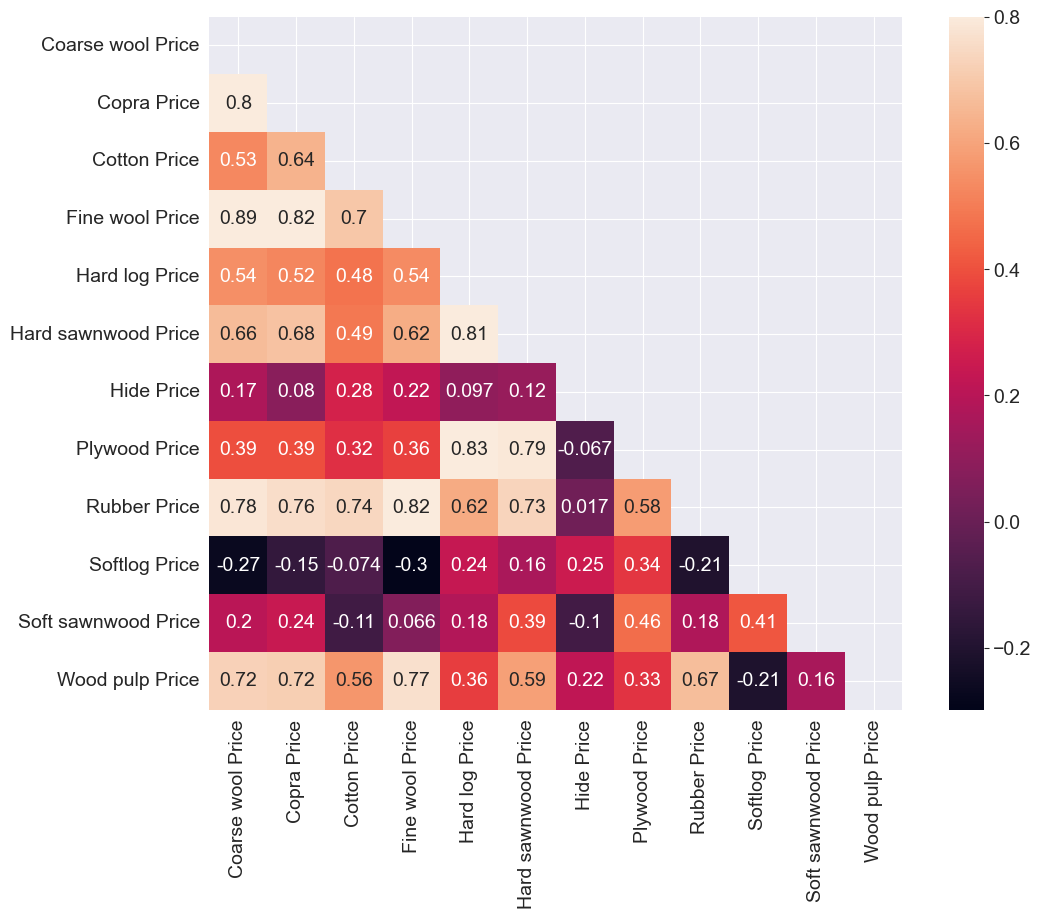

In [16]:
#lista de materiais
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#matriz de correlação
corrmat = df[raw_data].corr() 
#configurando tamanho do plot
fig = plt.figure(figsize = (12, 9))
#mascarando a parte superior do triângulo pois a matriz é simétrica (repetitiva) 
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

O mapa de calor mostra correlação entre as matérias primas: Quanto mais próximo de 1, maior a chance de serem duas materias primas relacionada

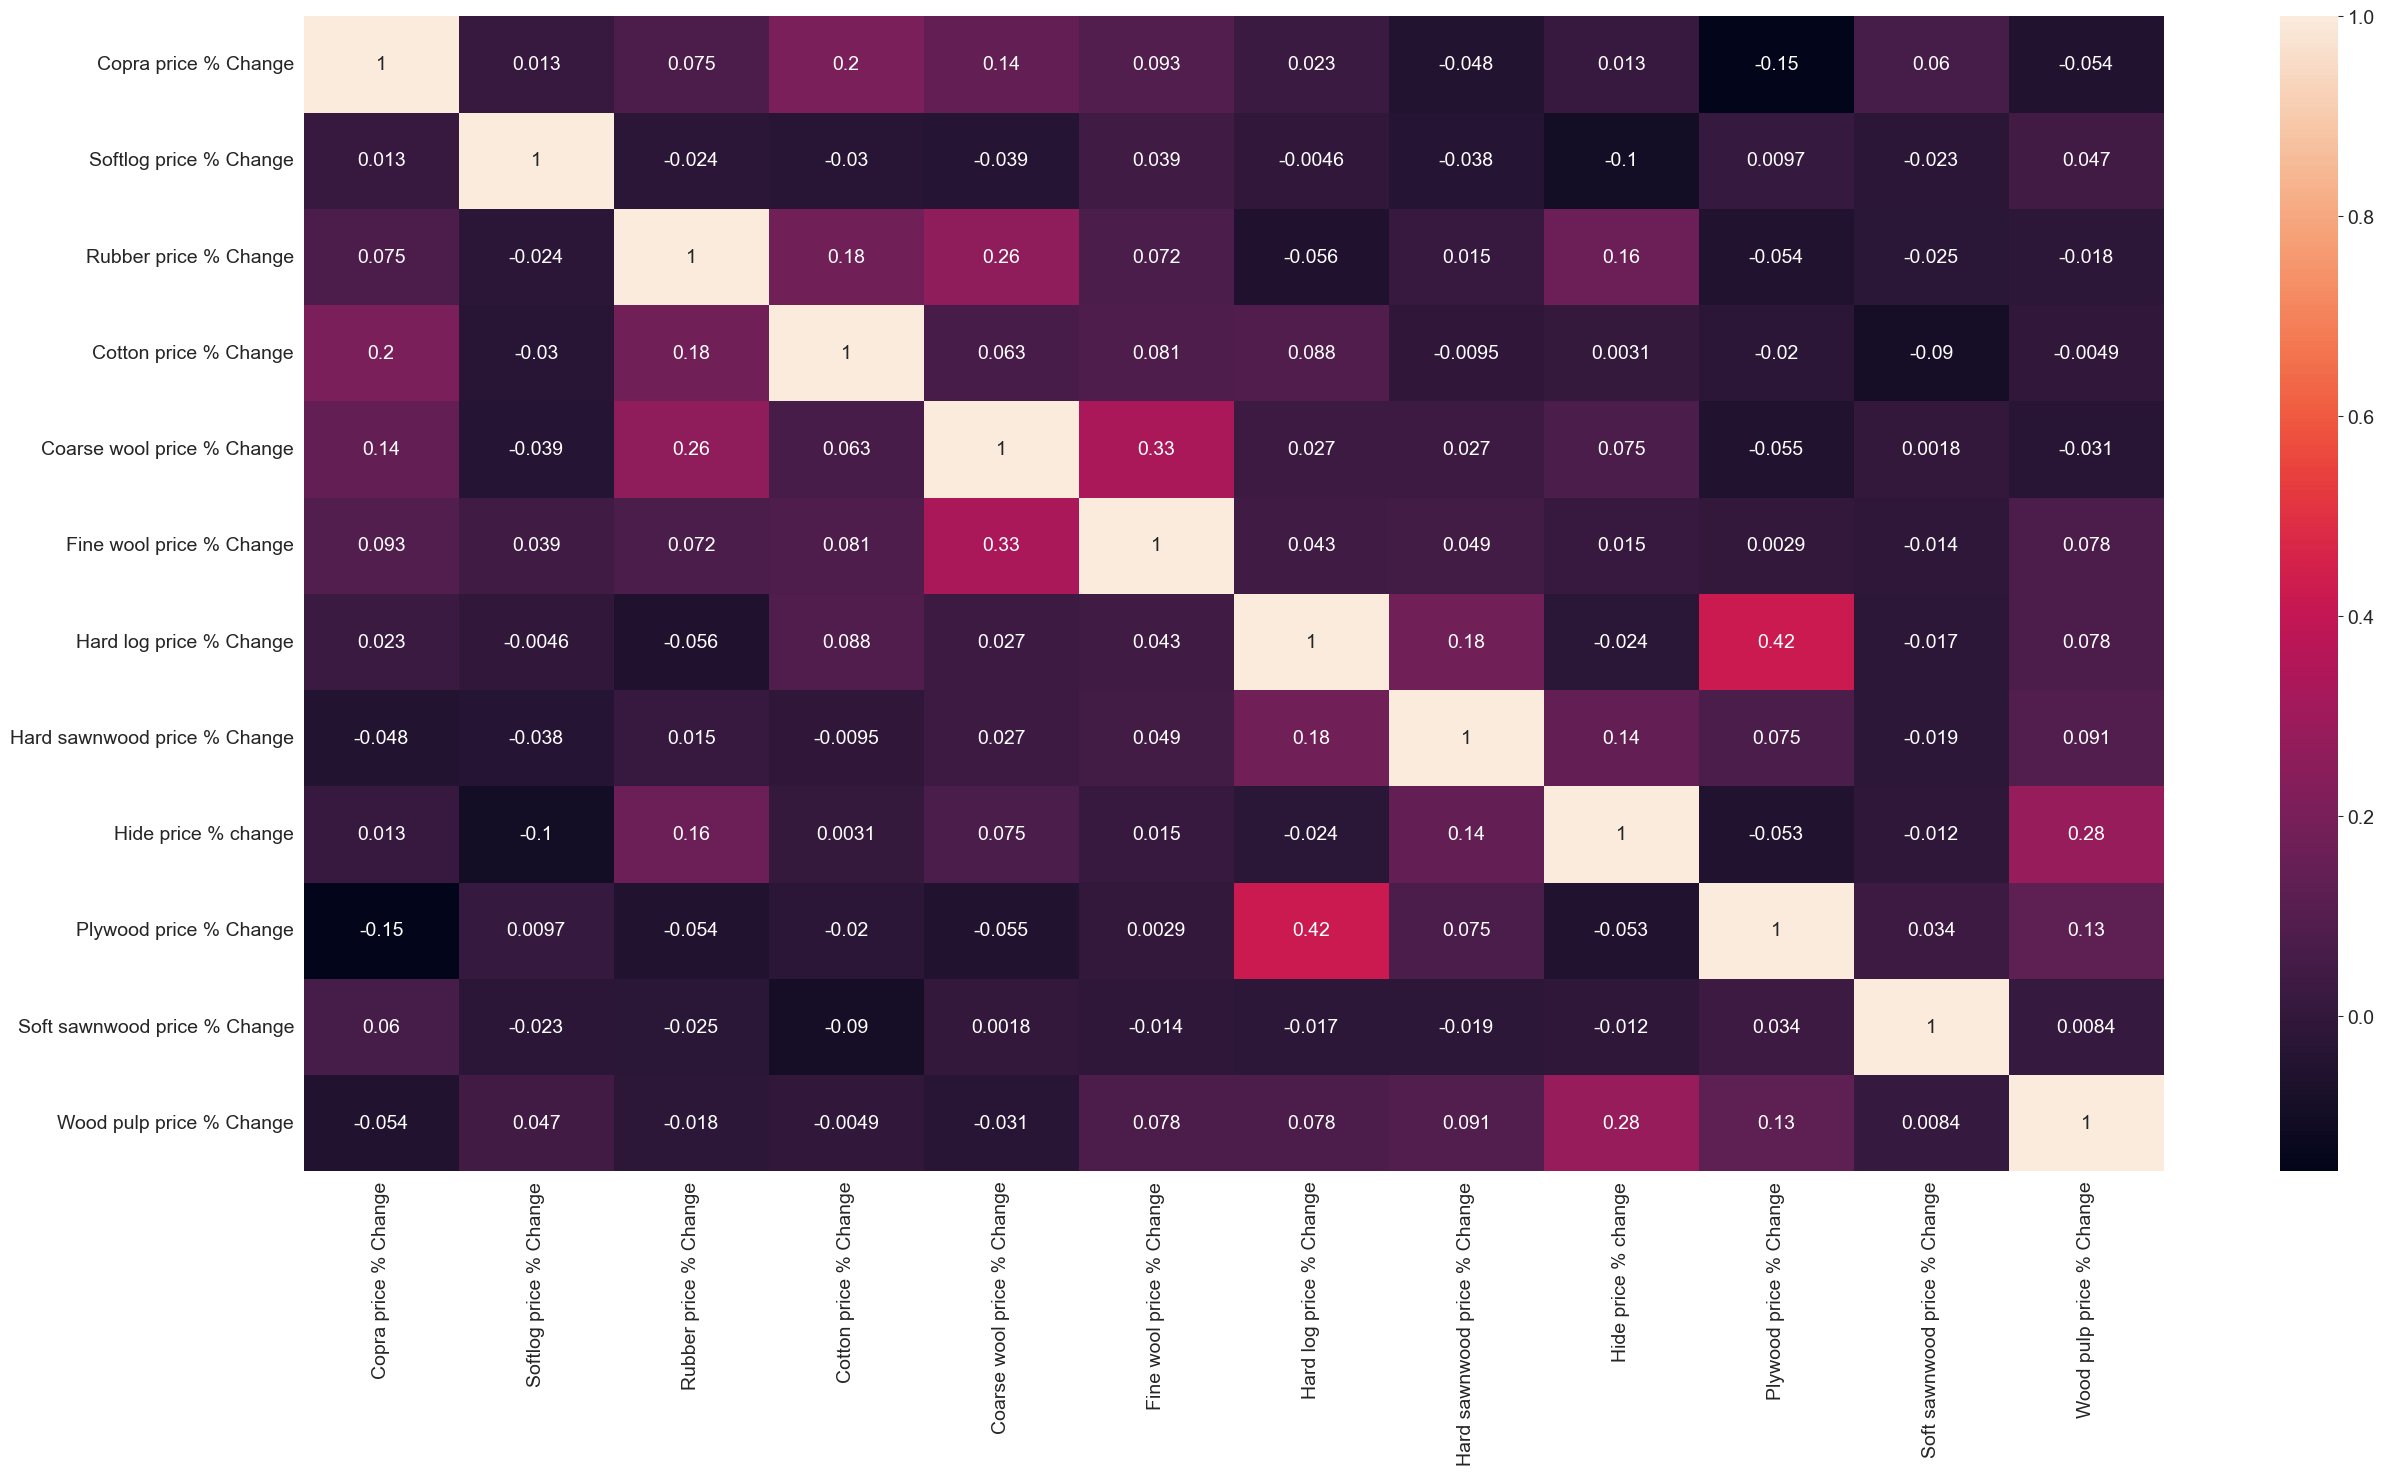

In [17]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#gerando matriz correlação apra todo o conjunto de dados
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

correlação forte são acima de 0.7

A partir desse gráfico, quase não existe relação entre a variação percentual dos preços das matérias primas.
- o valor negativo indica que duas variáveis estão negativamente correlacionadas (um aumento, outro decréscimo);
- Zero indica que não existe relação
- do contrario, quanto maior o valor maior a chance de relação.

Em suma, visualizando os dois graficos, tem relação entre o preço: quanto mais alto o preço de um produto, mais alto o preço da , porém se o preço percentual varia em uma matéria, não necessáriamente ocorrerá o mesmo em outra matéria.

Lã grossa

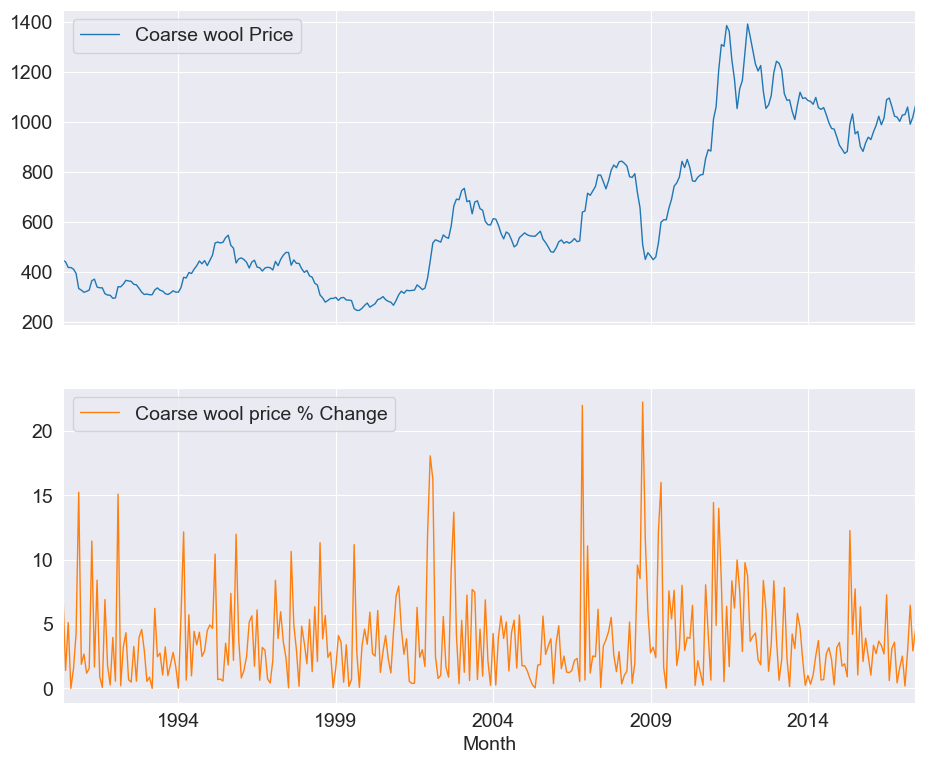

In [18]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

podemos fazer o mesmo com as outras matérias do conjunto de dados

Respondendo perguntas de negócio

variação normal do preço de cada materia prima (histograma)

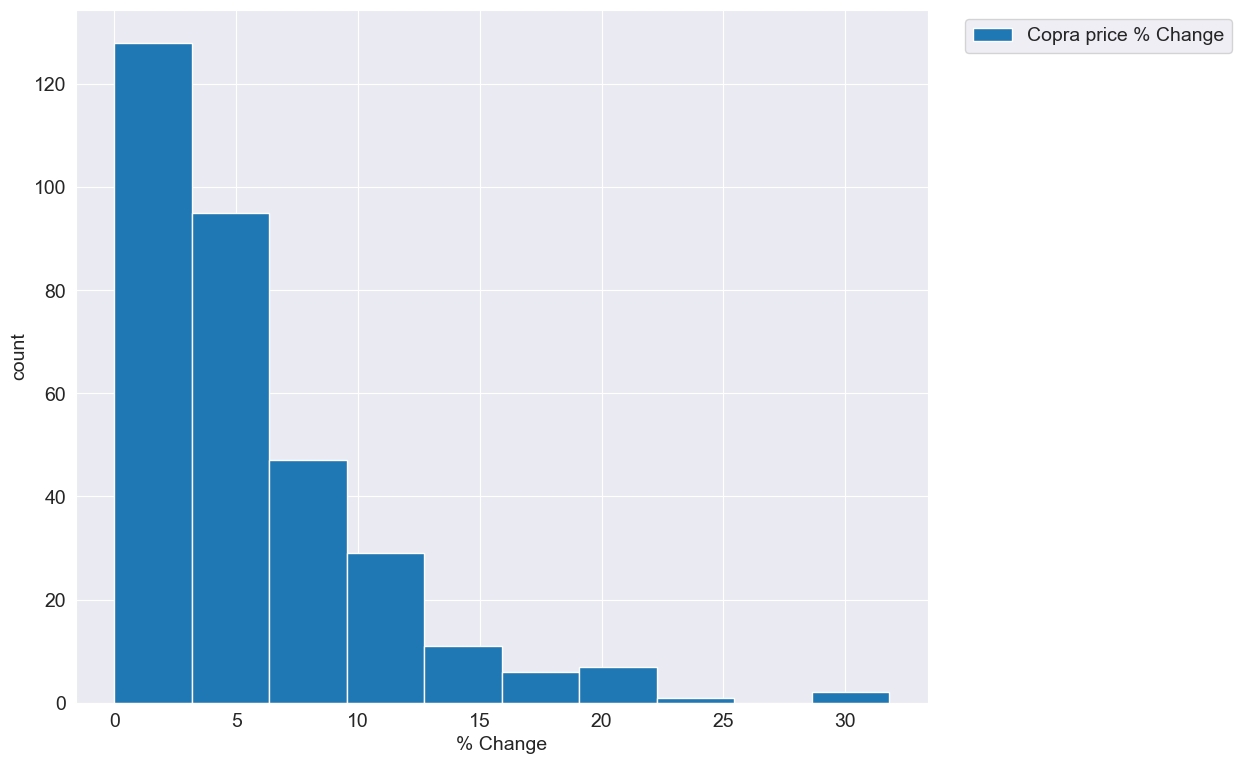

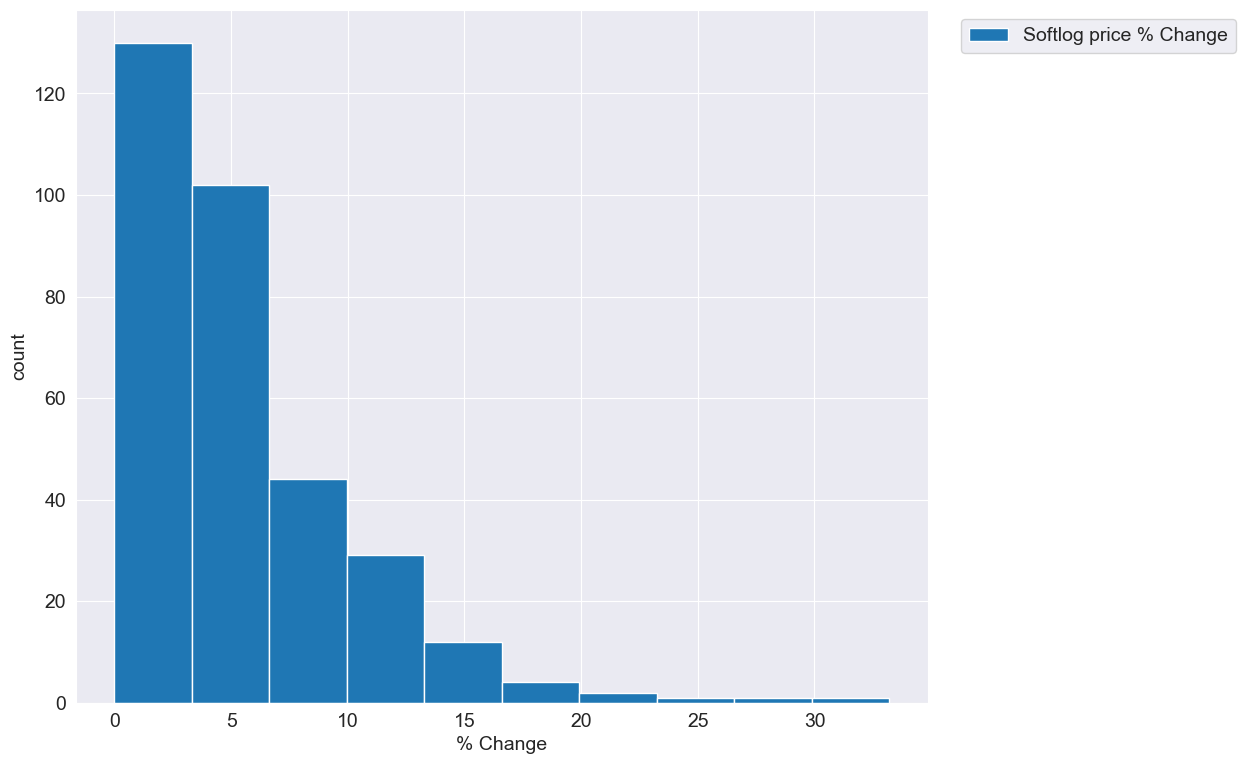

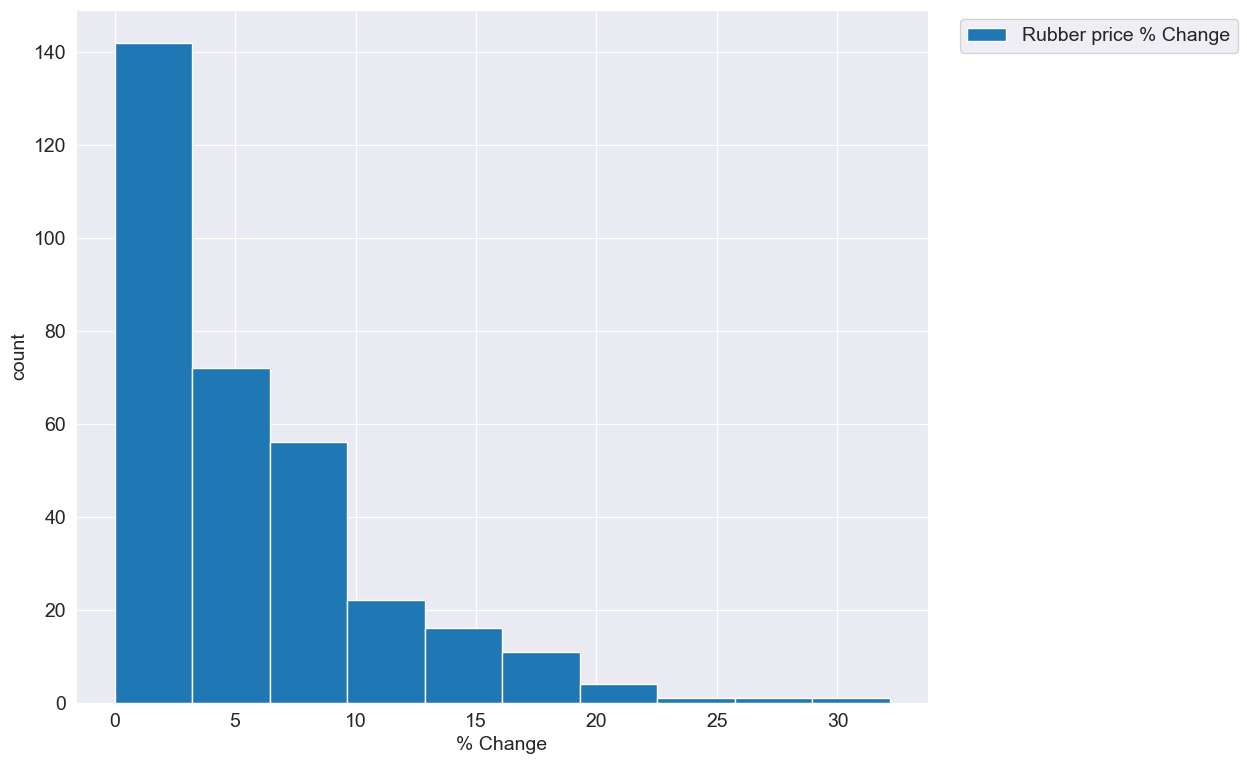

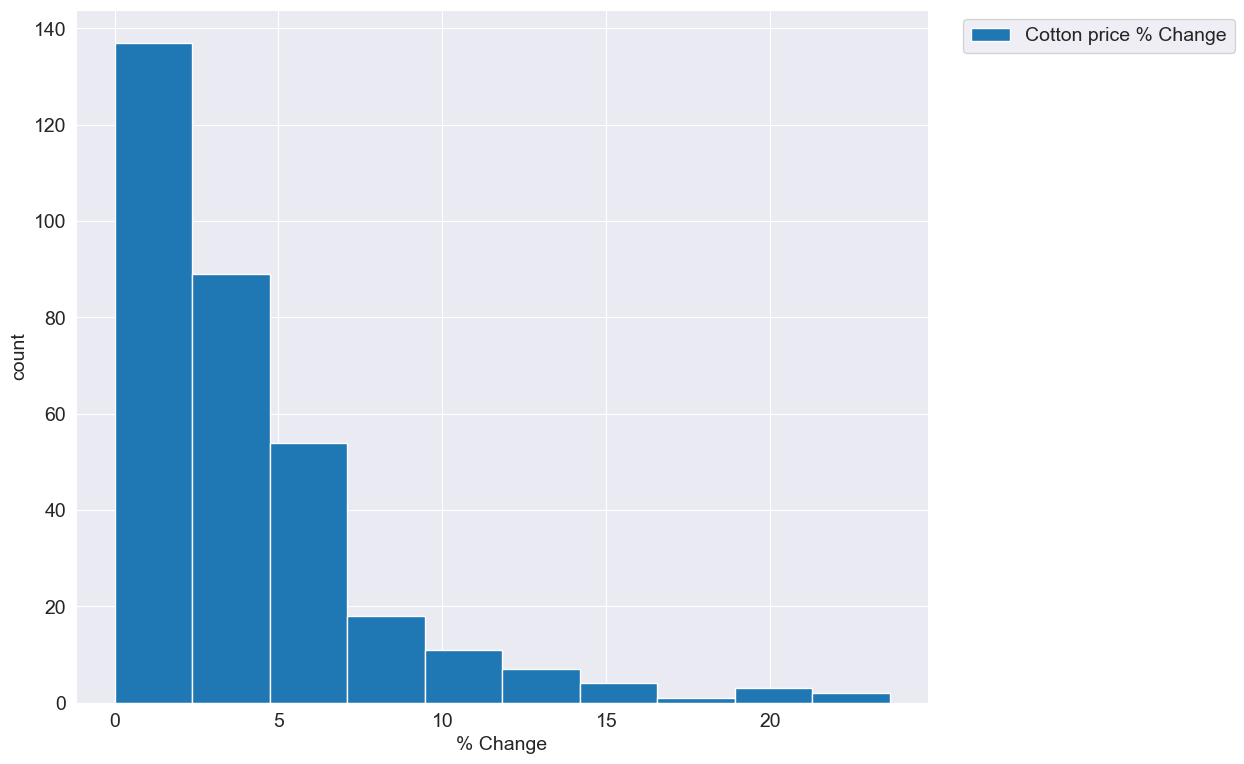

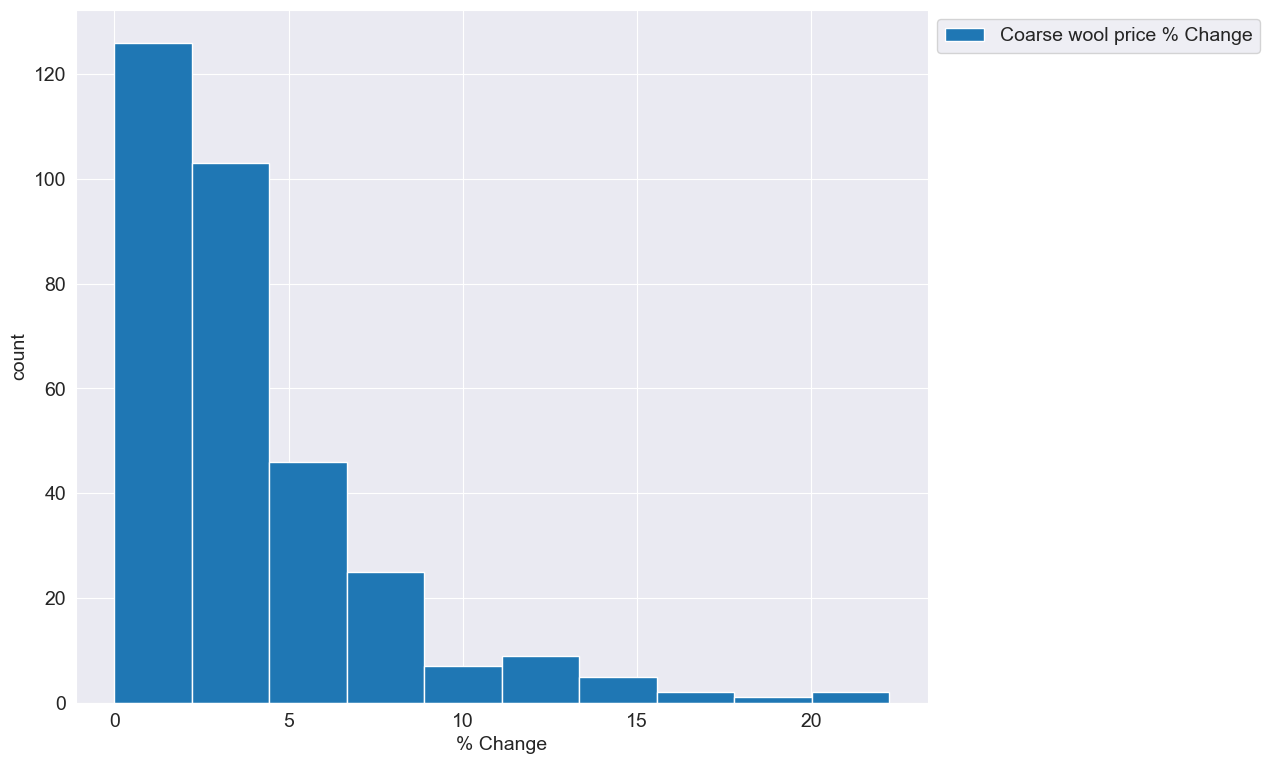

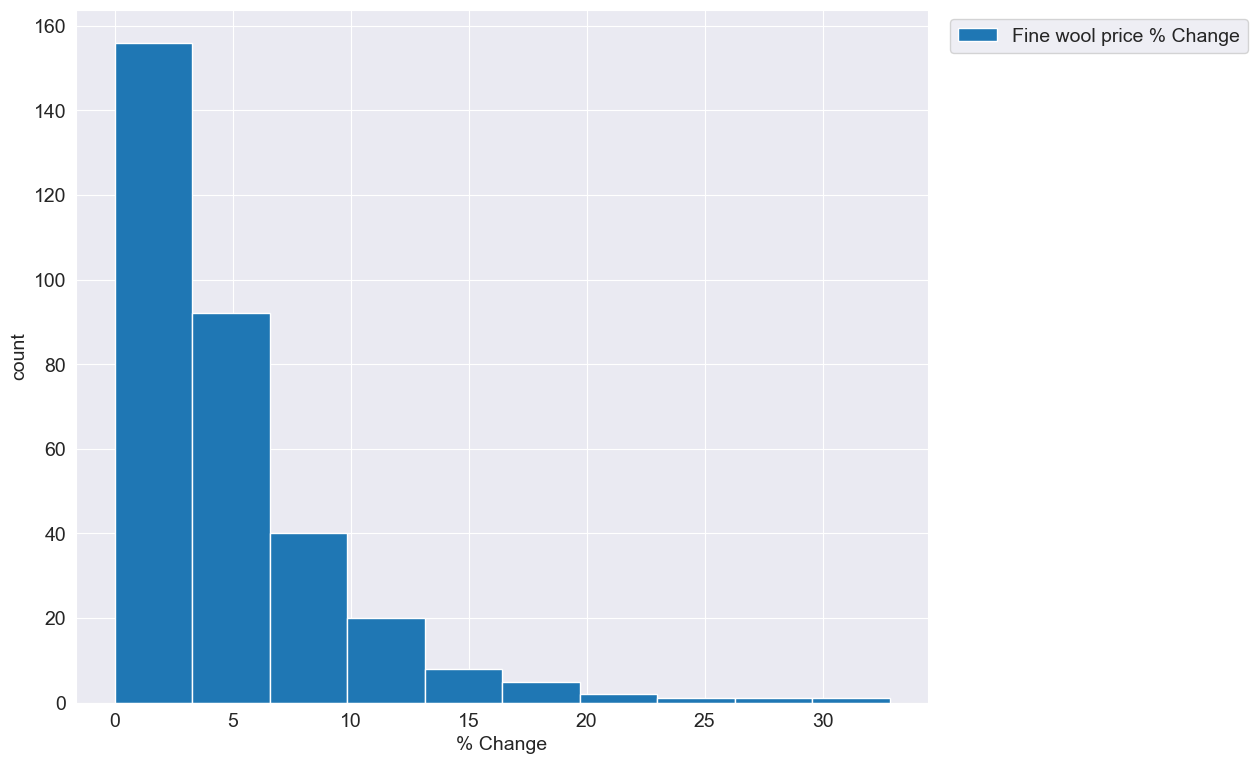

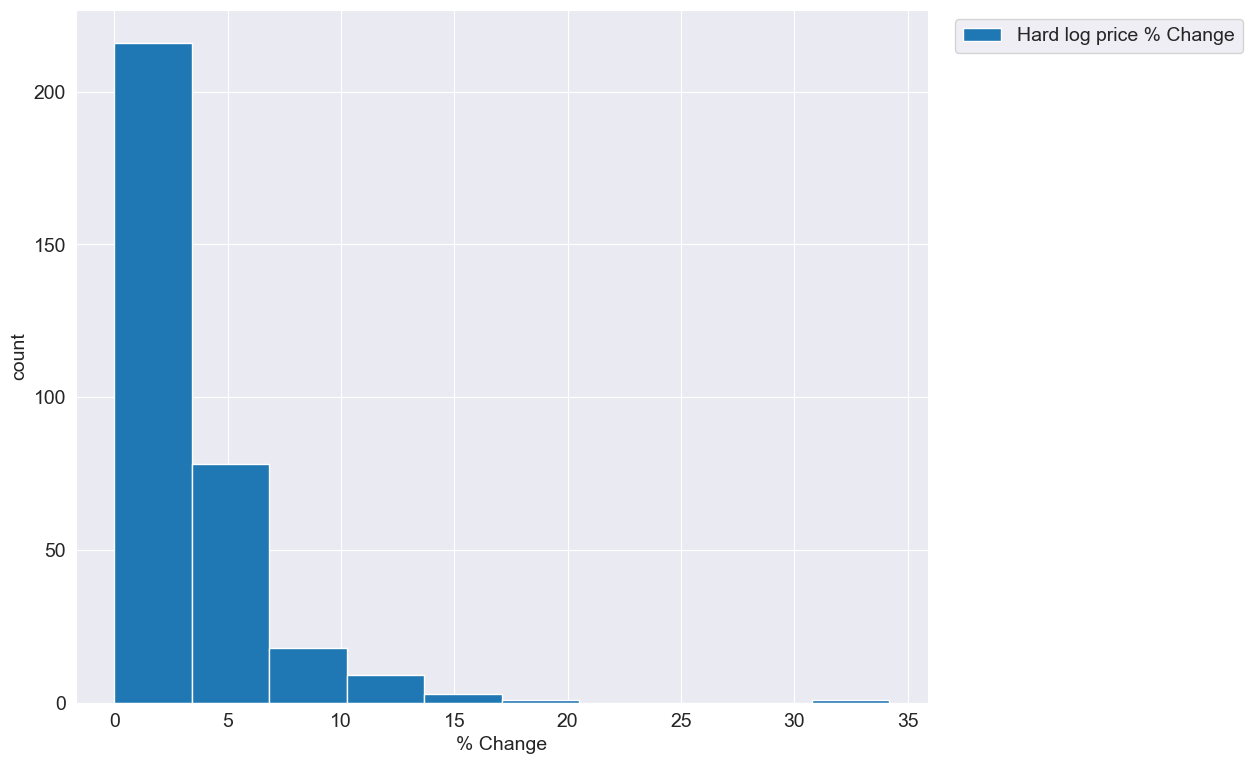

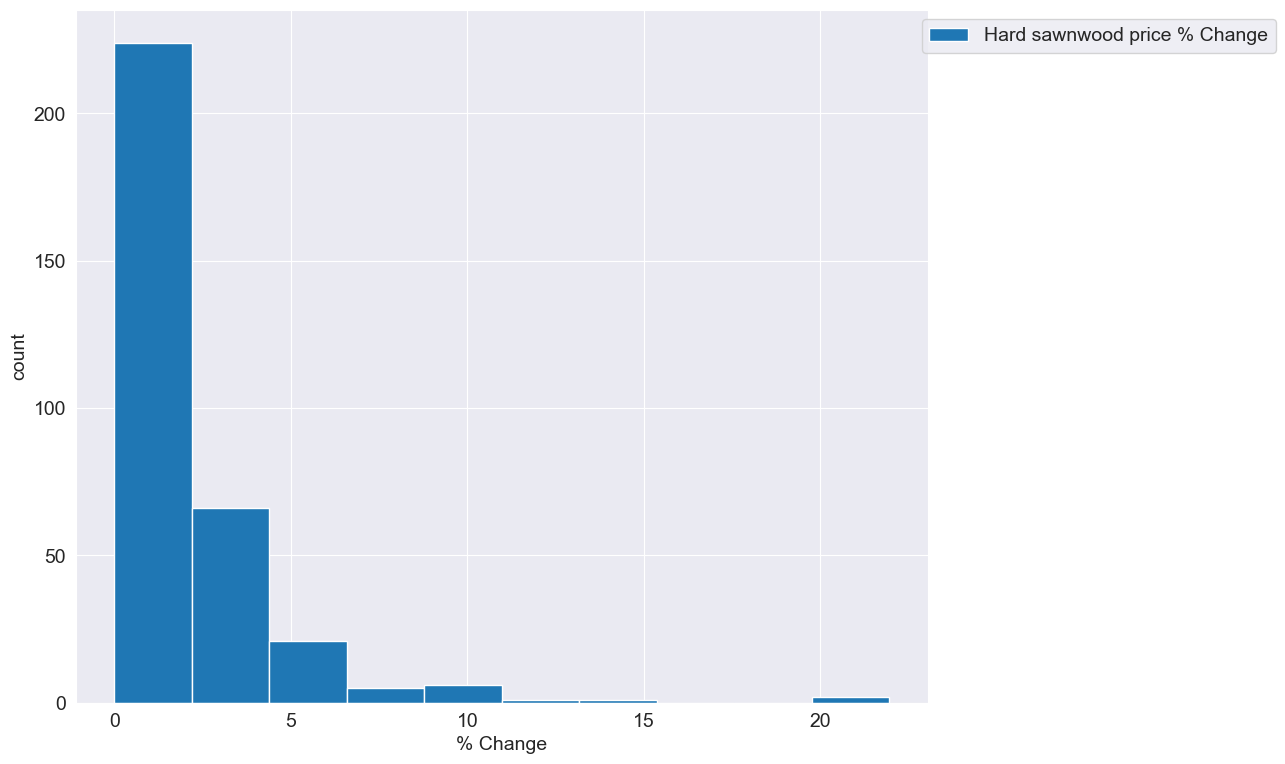

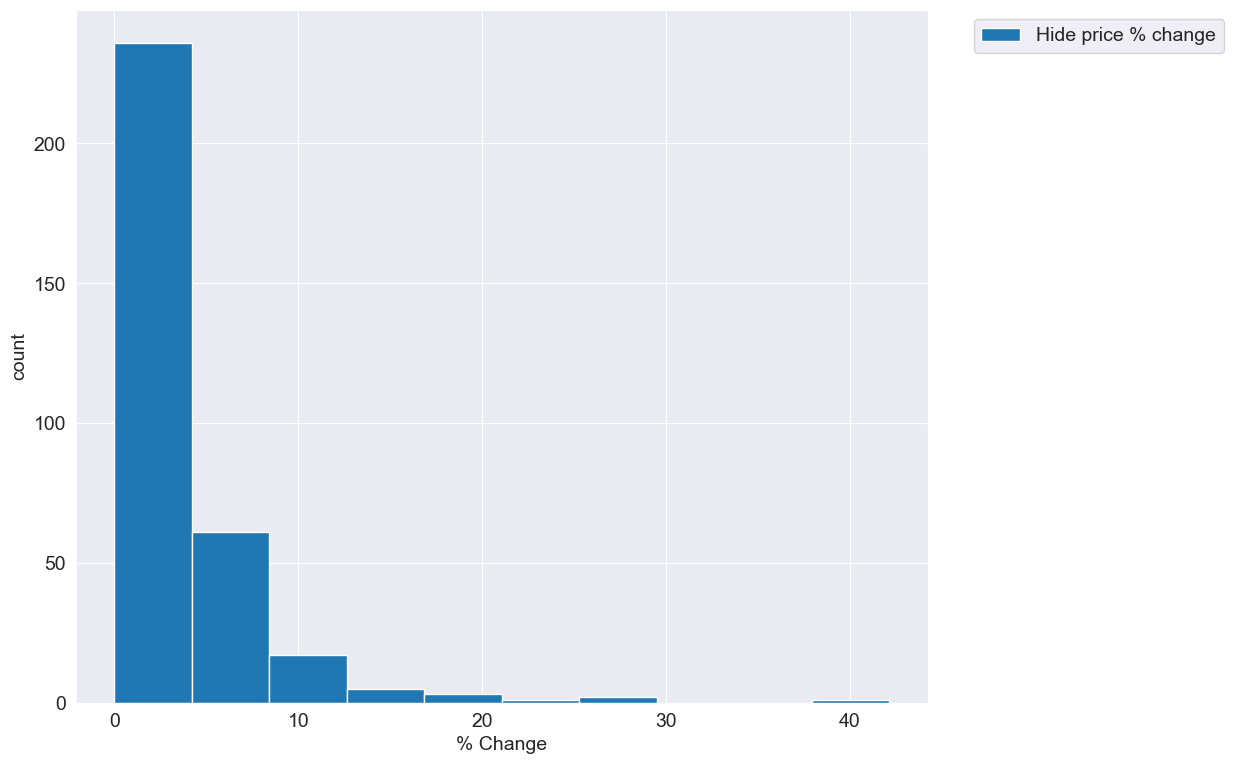

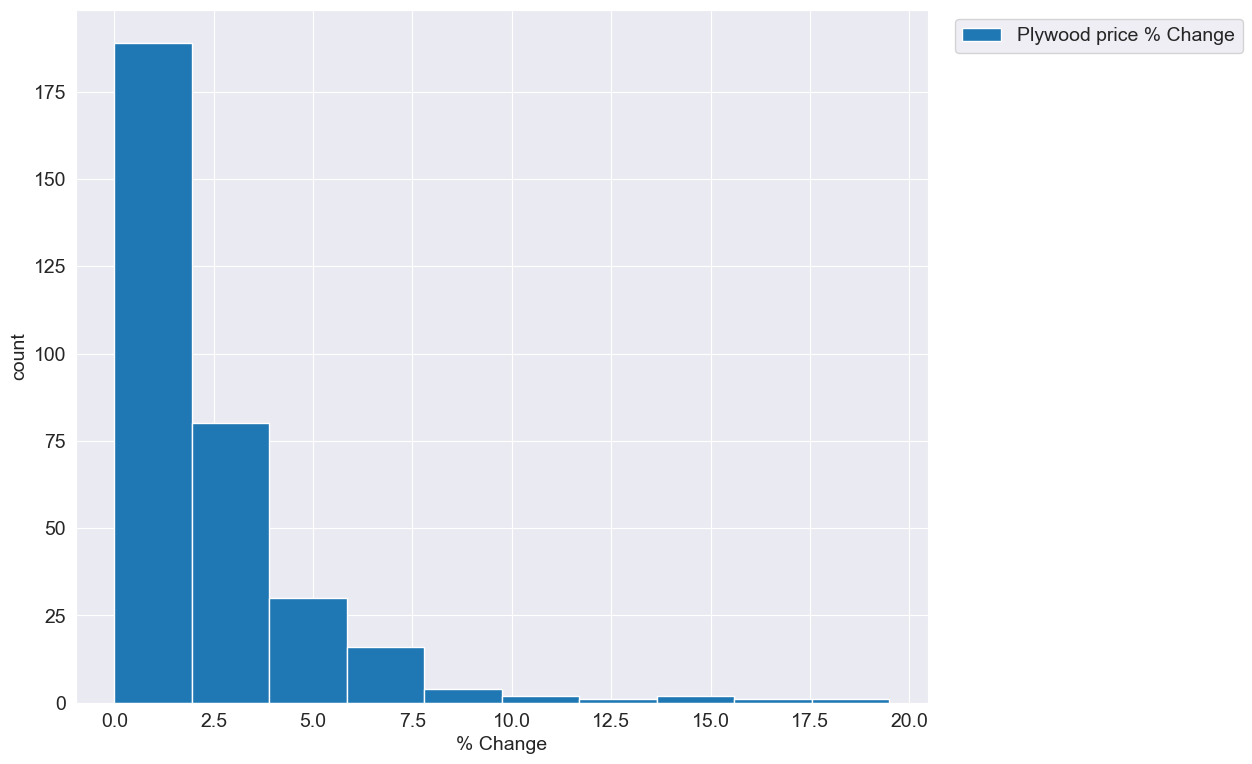

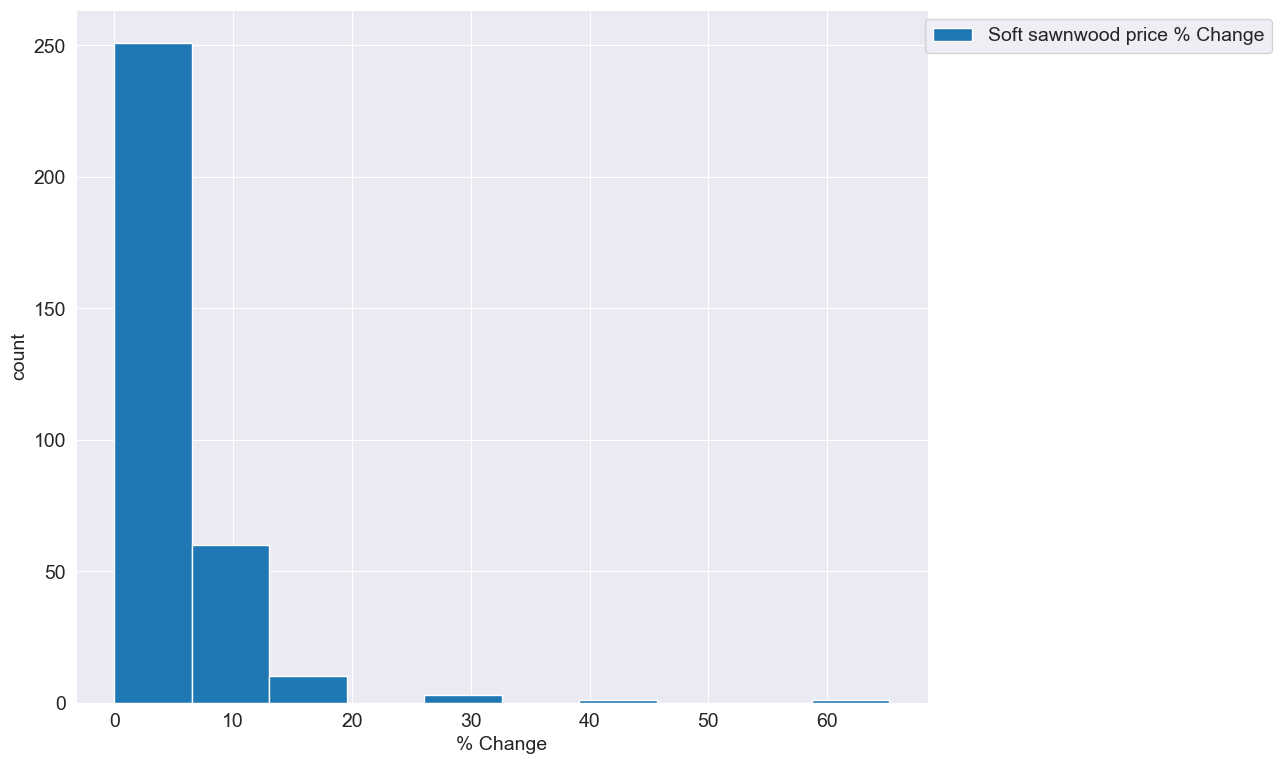

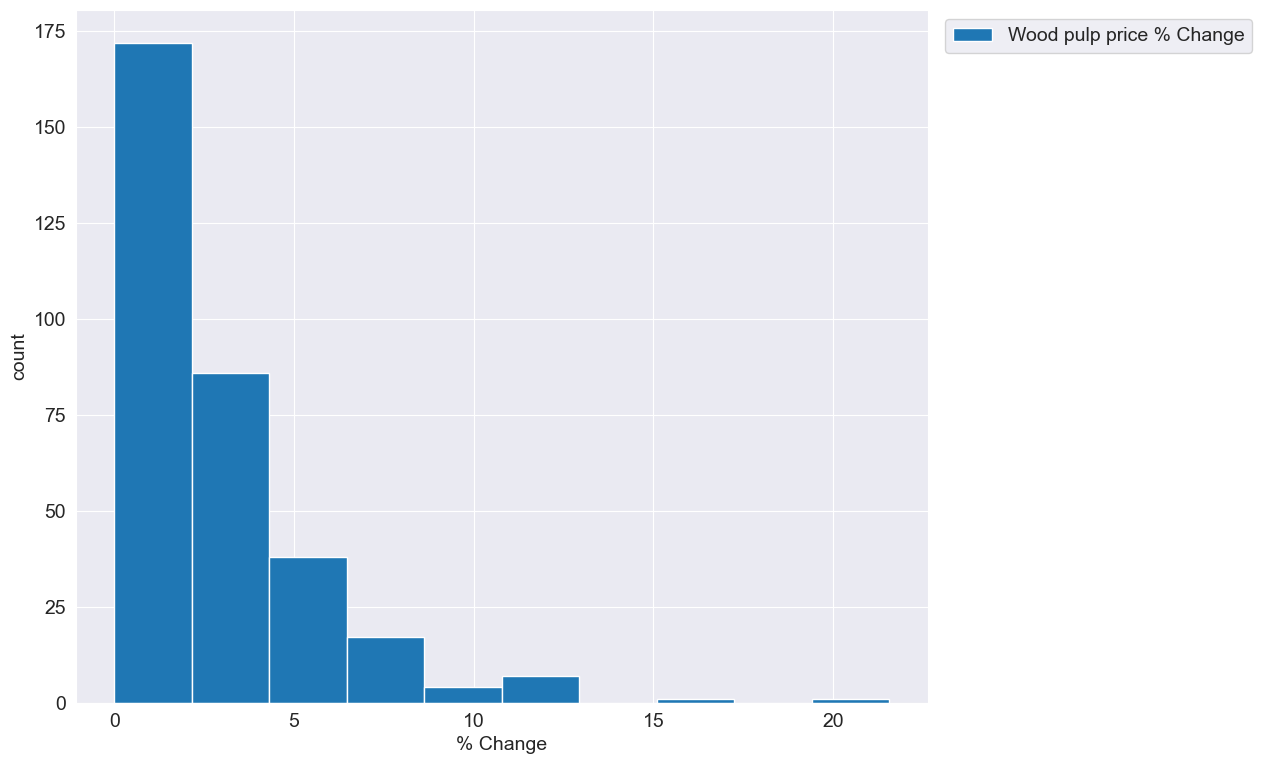

In [19]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))


a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%. Pensando em uma ótica de investimento, para um comprador que deseja não sofrer muito ou sofrer menos com a variação do preço, seria melhor comprar as matérias primas que sofreram menos com a variação em vez as mais volateis.

* materia prima com o menor preço ao longo dos anos

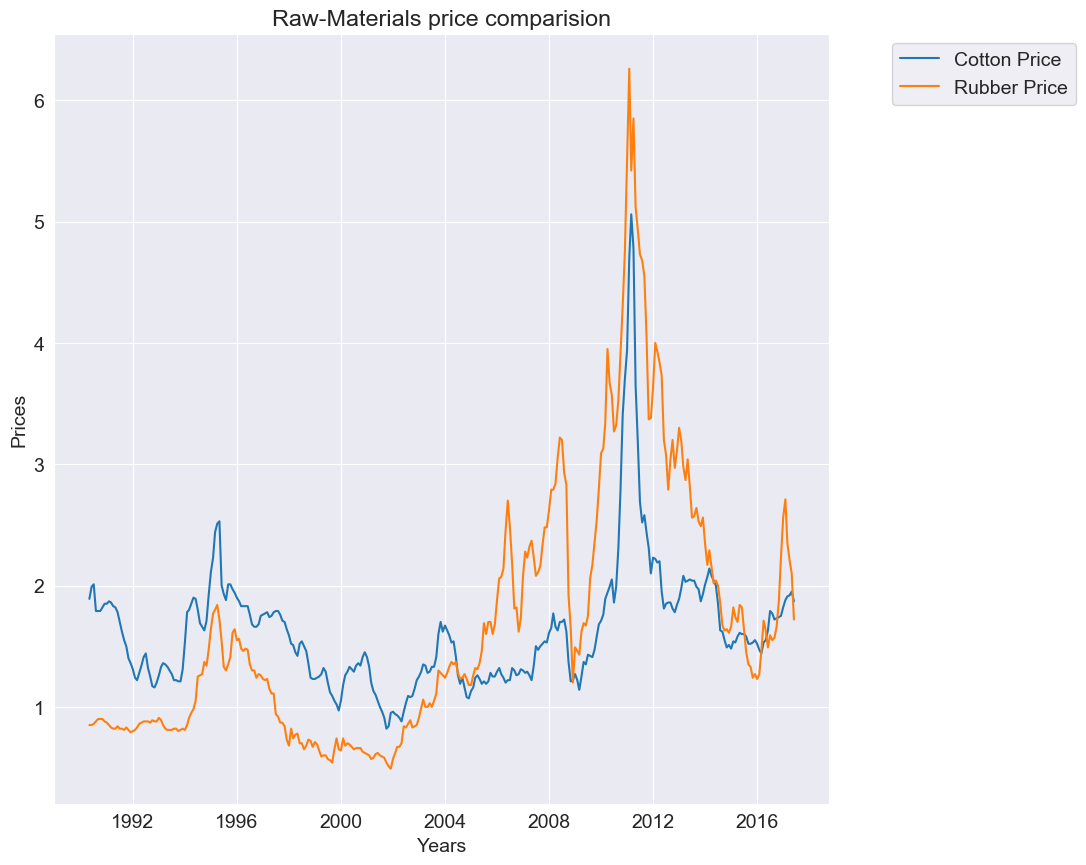

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

O algodão é a materia prima com o menos preço nos ultimos anos. Algodão e borracha são materiais de baixo preço.

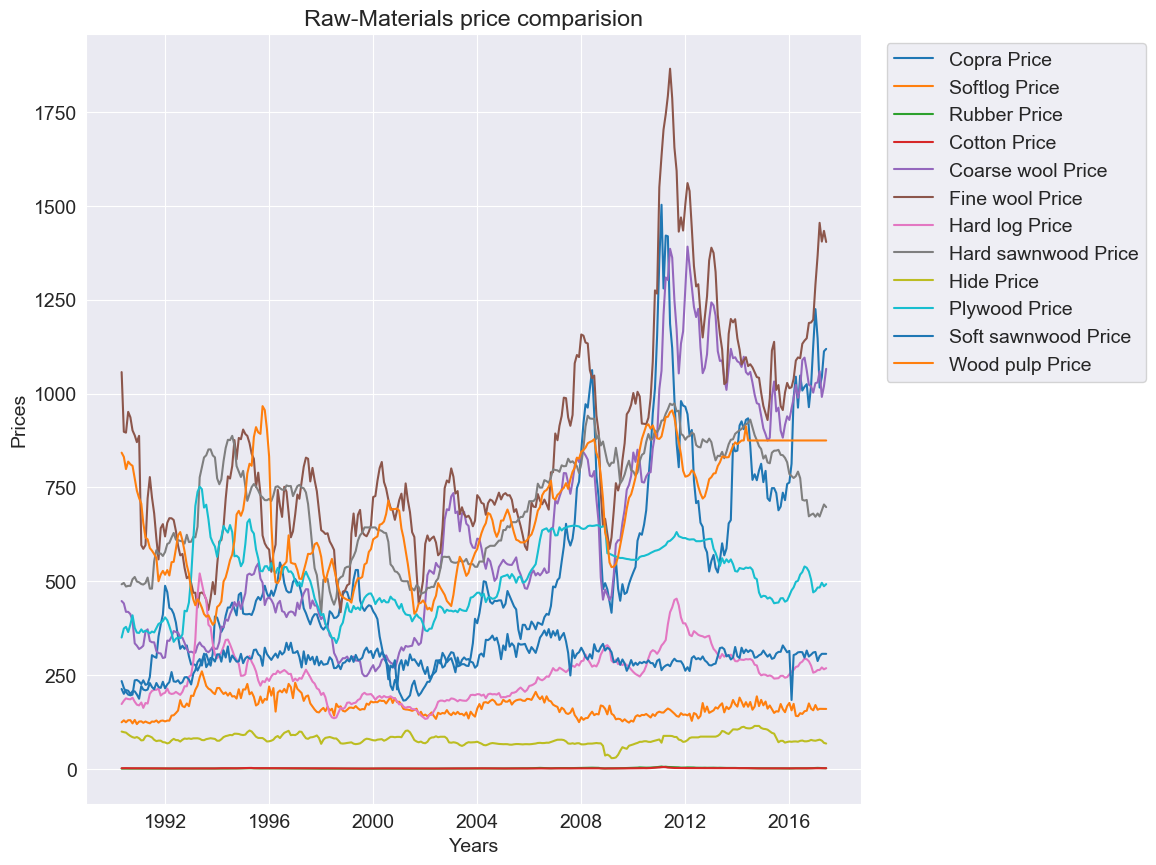

In [21]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

A partir dos gráficos é possível analisar as matérias primas em tipos de acordo com seu preço ao longo dos anos.

* materiais de baixo preço:

- algodão, couro, softlog, log duro, preço de madeira serrada macia, borracha

* Materiais de alto preço:

- lã grossa,copra,lã fina,madeira serrada dura,pasta de madeira,madeira compensada

Materia Prima com maior e menor variação % de preço

In [22]:
import random as random

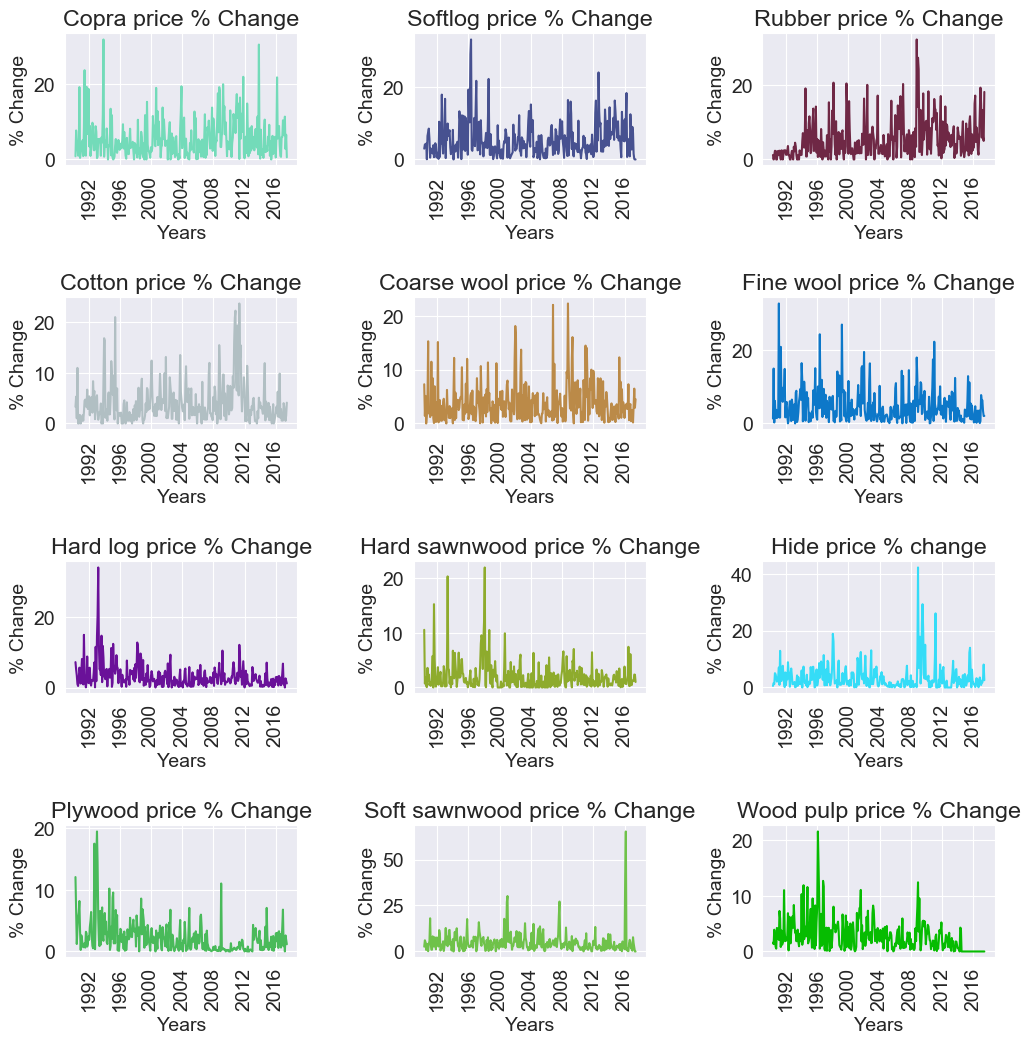

In [23]:
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
   
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')
    #plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

É possível verificar a maior percentual de mudança em mais de 60 para a madeira serrada macia e a menor percentual de mudança é para a madeira compensada em menos de 20.

* Matérias Primas com mudança mais drástica de preço

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

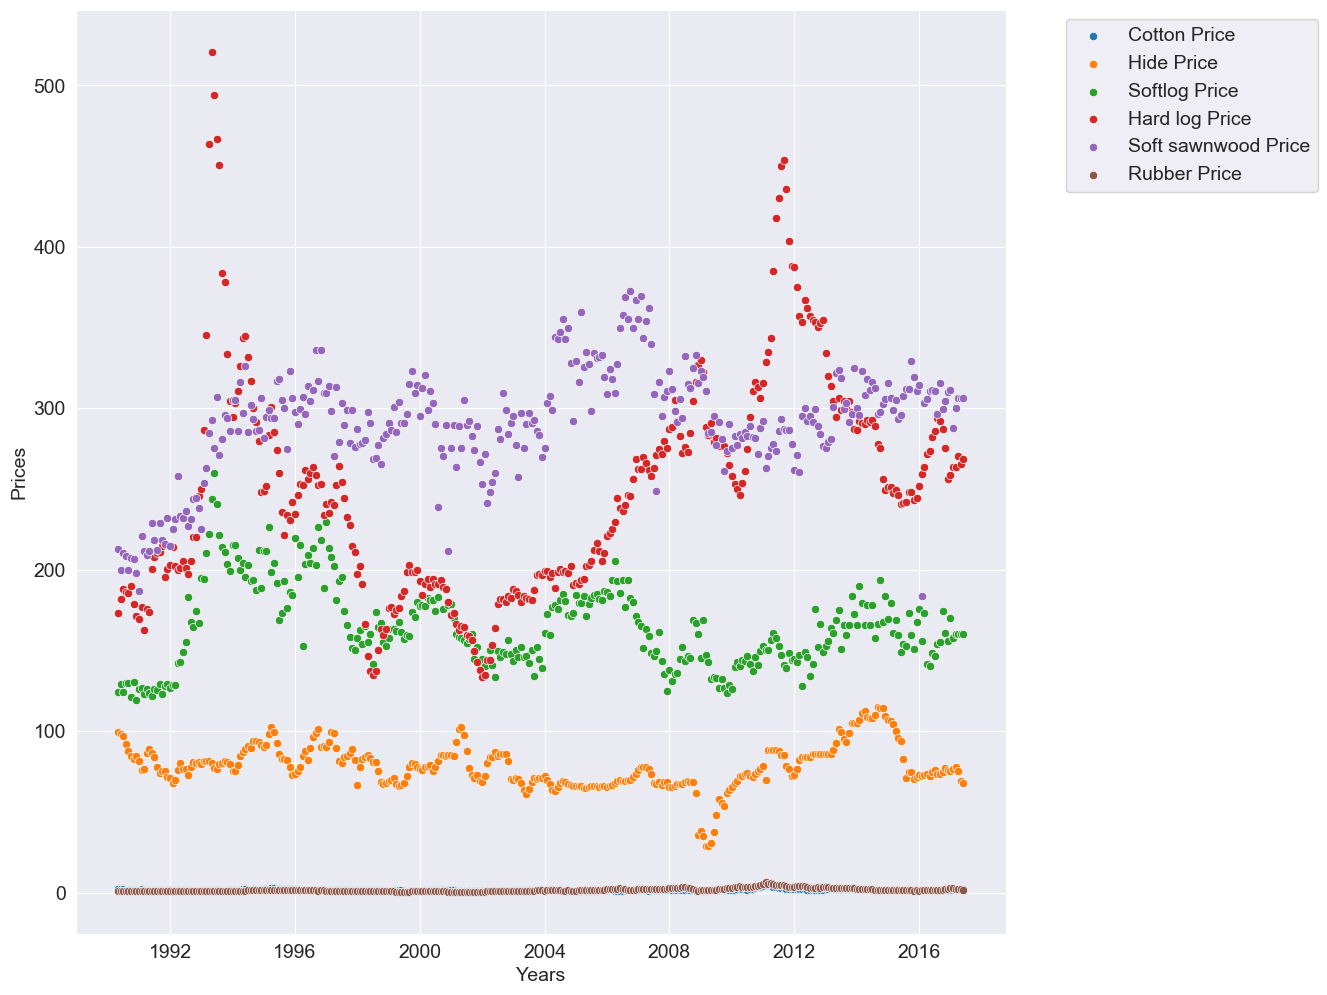

In [24]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

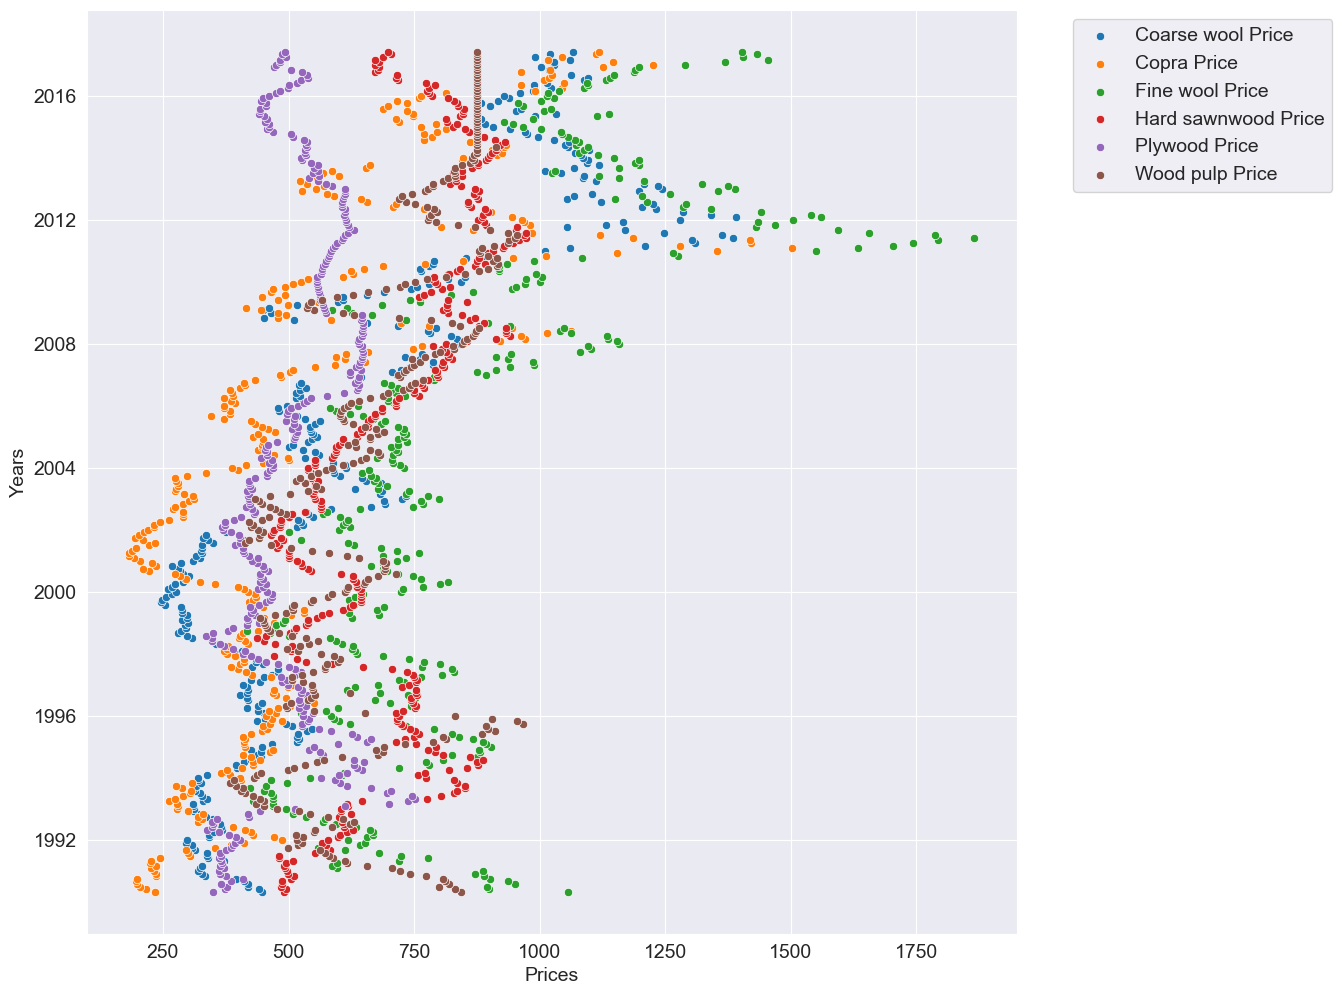

In [25]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))

A mudança de preço é drástica para o preço de tora dura entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de lã fina

* Faixa de preço de materias primas de baixo preço

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

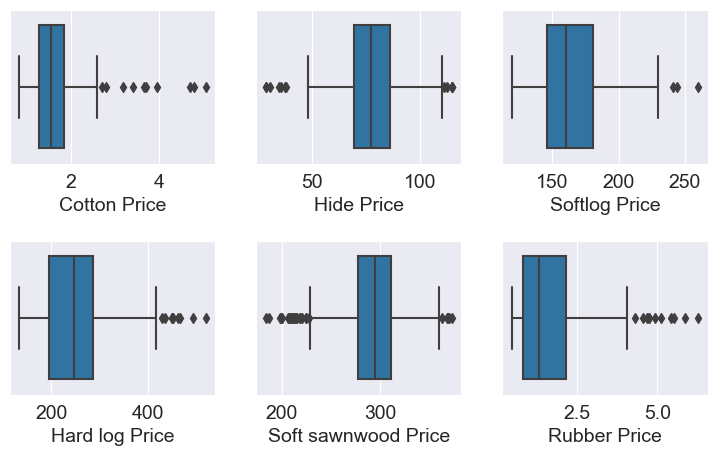

In [26]:
#plt.figure(figsize=(10, 10))
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers

# Inferencias e conclusão
- Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços;
- alta e baixa porcentagem de variação dos materiais;
- Pudemos identificar a variação de preços ao longo dos anos;
- Correlação entre eles usando um mapa de calor.

# Trabalho futuro
- Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas;
- Também pudemos prever os preços das matérias-primas analisando os anos anteriores;

- Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.